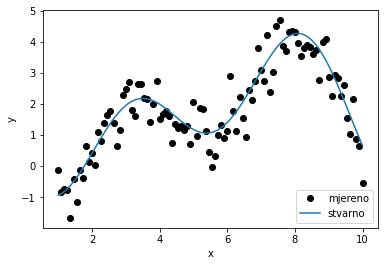

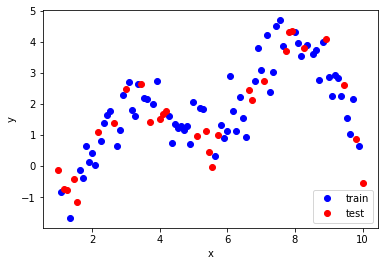

Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14219055] + [[0.3225882]] *x


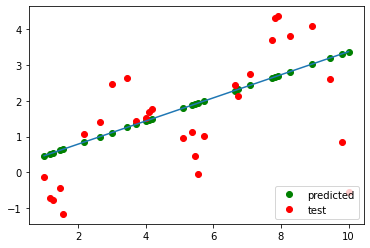

In [1]:
#Pokrenite primjer 4.1. iz dodatka. U ovom primjeru generiraju se umjetni podaci
#te se izgrađuje linearni regresijski model.
#Razmislite koji dio programskog koda odgovara kojem dijelu teorije predstavljene u opisu ove vježbe. 
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y
def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy
x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)
plt.figure(1)
plt.plot(x,y_measured,'ok',label='mjereno')
plt.plot(x,y_true,label='stvarno')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)
plt.show()
np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]
xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]
plt.figure(2)
plt.plot(xtrain,ytrain,'ob',label='train')
plt.plot(xtest,ytest,'or',label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)
plt.show()
linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)
print('Model je oblika y_hat = Theta0 + Theta1 * x')
print('y_hat = ', linearModel.intercept_, '+', linearModel.coef_, '*x')
ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
plt.figure(3)
plt.plot(xtest,ytest_p,'og',label='predicted')
plt.plot(xtest,ytest,'or',label='test')
plt.legend(loc = 4)
x_pravac = np.array([1,10])
x_pravac = x_pravac[:, np.newaxis]
y_pravac = linearModel.predict(x_pravac)
plt.plot(x_pravac, y_pravac)

plt.show()

Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14219055] + [[0.3225882]] *x




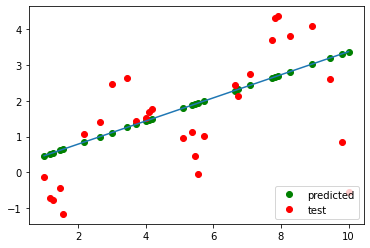

parametri dobiveni formulom: [0.14219055] [0.3225882]


In [2]:
"""
Na podacima iz zadatka 1 potrebno je odrediti parametre linearnog modela na podacima za učenje na način da se
implementira funkcija za izračunavanje parametara linearnog modela prema (4-10). Usporedite dobivene parametre
modela s vrijednostima parametara linearnog modela iz zadatka 1.
"""
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error

"""
Potrebno je dodati poseban stupac s jedinicama u xtrain kako bismo mogli dobiti zadovoljavajuć oblik s dva rezultantna parametra.
Zatim pomoću dane formule implementirane u metodi "calculateParams" izračunamo tražene parametre.
"""

def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y

def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy

#funkcija za dodavanje stupca s jedinicama
def addOnes(xtrain):
 column_ones=np.ones(len(xtrain))
 column_ones=column_ones[:,np.newaxis]
 x_p=np.hstack((column_ones,xtrain))
 return x_p


#funkcija za izracun parametara
def calculateParams(x_p):
 transposed=np.transpose(x_p)
 invert=np.linalg.inv(np.dot(transposed,x_p))
 theta1=np.dot(np.dot(invert,transposed),ytrain)
 return theta1


x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)

np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]

xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

print ('Model je oblika y_hat = Theta0 + Theta1 * x')
print ('y_hat = ', linearModel.intercept_, '+', linearModel.coef_, '*x')
print('\n')
ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

plt.figure(3)
plt.plot(xtest,ytest_p,'og',label='predicted')
plt.plot(xtest,ytest,'or',label='test')
plt.legend(loc = 4)

x_pravac = np.array([1,10])
x_pravac = x_pravac[:, np.newaxis]
y_pravac = linearModel.predict(x_pravac)
plt.plot(x_pravac, y_pravac)
plt.show()

x_p=addOnes(xtrain)

theta1= calculateParams(x_p)
print("parametri dobiveni formulom: " + str(theta1[0]) +" " + str(theta1[1]))


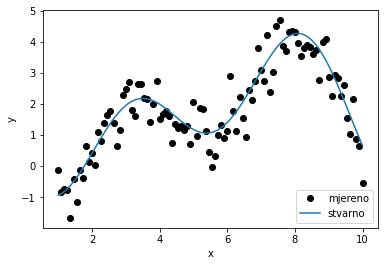

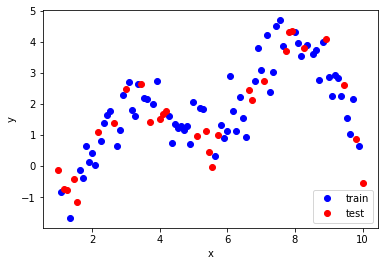

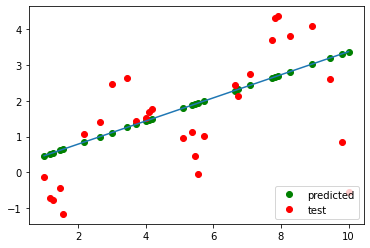

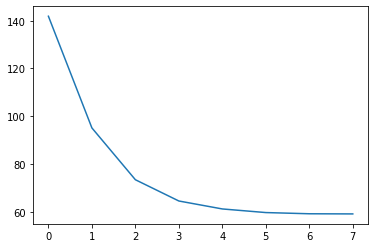

oblik modela: y_kappa = Theta0 + Theta1 * x
y_kappa =  [0.14217161] + [0.32259102]  * x


In [3]:
"""
Na podacima iz zadatka 1 potrebno je odrediti parametre linearnog modela na podacima za
učenje na način da se implementira funkcija za izračunavanje parametara linearnog modela
metodom gradijentnog spusta. Usporedite dobivene parametre modela s vrijednostima parametara
linearnog modela iz zadatka 1.
Slikom prikažite vrijednosti kriterijske funkcije u svakoj iteraciji algoritma.
Mijenjate duljinu koraka α od vrlo malih vrijednosti do vrlo velikih vrijednosti. Što se događa?
"""

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error


def non_func(x):
    y = 1.6345 - 0.6235 * np.cos(0.6067 * x) - 1.3501 * np.sin(0.6067 * x) - 1.1622 * np.cos(
        2 * x * 0.6067) - 0.9443 * np.sin(2 * x * 0.6067)
    return y


def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1 * varNoise * np.random.normal(0, 1, len(y))
    return y_noisy


def createLine(x, theta0, theta1):
    return theta0 + theta1 * x


x = np.linspace(1, 10, 100)
y_true = non_func(x)
y_measured = add_noise(y_true)

plt.figure(1)
plt.plot(x, y_measured, 'ok', label='mjereno')
plt.plot(x, y_true, label='stvarno')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4)

np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7 * len(x)))]
indeksi_test = indeksi[int(np.floor(0.7 * len(x))) + 1:len(x)]

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]

xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]

plt.figure(2)
plt.plot(xtrain, ytrain, 'ob', label='train')
plt.plot(xtest, ytest, 'or', label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4)

linearModel = lm.LinearRegression()
linearModel.fit(xtrain, ytrain)

ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

plt.figure(3)
plt.plot(xtest, ytest_p, 'og', label='predicted')
plt.plot(xtest, ytest, 'or', label='test')
plt.legend(loc=4)

x_pravac = np.array([1, 10])
x_pravac = x_pravac[:, np.newaxis]
y_pravac = linearModel.predict(x_pravac)
plt.plot(x_pravac, y_pravac)


n = len(xtrain)


alfa = 0.01
theta = [0, 0]
distances = []
def gradientParams(alfa, theta, distances):
    for i in range(0, 5000):
        tempSum1 = 0
        tempSum2 = 0
        distance = 0
        for j in range(0, n):

            tempSum1 = tempSum1 + (createLine(xtrain[j], theta[0], theta[1]) - ytrain[j]) * xtrain[j] / len(xtrain)
            tempSum2 = tempSum2 + (createLine(xtrain[j], theta[0], theta[1]) - ytrain[j]) / len(xtrain);
            distance = distance + abs(ytrain[j] - theta[0] - theta[1] * xtrain[j])

        distances.append(distance)
        theta[0] = theta[0] - alfa * tempSum2
        theta[1] = theta[1] - alfa * tempSum1

gradientParams(alfa, theta, distances)

plt.figure(4)
plt.plot(distances[:8])
plt.show()
print('oblik modela: y_kappa = Theta0 + Theta1 * x')
print('y_kappa = ', theta[0], '+', theta[1], ' * x')



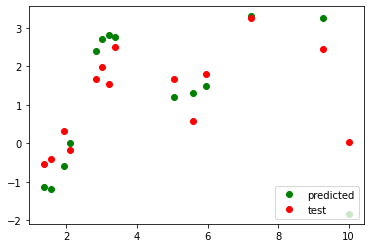

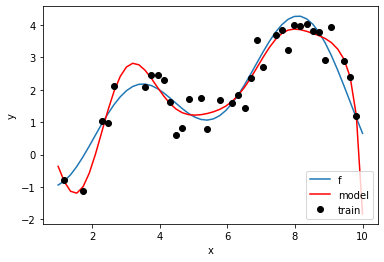

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y

def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy

x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)

np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]
xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]
xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]
linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)
ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)
plt.show()
#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)
plt.show()